### Условие задачи

**Дано:**
- гипершар радиуса $1$ в пространстве $R^n, n=1..16$
- величины абсолютной и относительной погрешностей: $10^{-6}$, $10^{-6}$
- геометрический метод Монте-Карло

**Требуется:**
- указанным методом рассчитать объем гипершара в пространствах заданных размерностей
- в процессе расчета выводить время расчета для каждой размерности пространства
- оценить необходимое количество точек для достижения заданных погрешностей
- отобразить график объема гипершара в зависимости от размерности пространства (график 1)
- отобразить график количества точек в зависимости от размерности пространства (график 2)
- вывести разницу между полученным результатом и точными значениями (точные значения приведены на Рис. 1)

<img src='https://upload.wikimedia.org/wikipedia/commons/6/6c/Hypersphere_volume_and_surface_area_graphs.svg' width=480></img>

<center>Рис. 1. График аналитической зависимости объема и площади поверхности гипершара от размерности пространства</center>

**Описание метода:**

Возьмем случайную равномерно распределенную выборку векторов $\xi_k^{(n)}, k \in [1, 2, ..., K]$ внутри куба $[0, 1]^n$.

Пусть $T \subset [1, 2, ..., K]$ - множество индексов векторов из выборки, лежащих внутри гипершара, т.е. $||\xi_i^{(n)}|| < 1, i \in T$.

Тогда оценкой объема гипершара будет $V_K^{(n)} \approx 2^n \cdot \dfrac{|T|}{K}$, где $|T|$ - количество элементов множества $T$.

Для оценки вероятностной погрешности воспользуемся следующим подходом:
- $\Delta V_K^{(n)} = |V_{K+\Delta K}^{(n)} - V_K^{(n)}|$
- $s = \varepsilon_a + |V_{K+\Delta K}^{(n)}| * \varepsilon_r$
- условие $\dfrac{|\Delta V_K^{(n)}|}{s} < 1.0$ означает, что удовлетворены абсолютная и относительная погрешности


**Материалы:**
- [N-sphere](https://en.wikipedia.org/wiki/N-sphere)
- [Метод Монте-Карло](https://ru.wikipedia.org/wiki/Метод_Монте-Карло)
- [Геометрический метод Монте-Карло](https://scask.ru/f_book_cmk.php?id=56)

In [1]:
import numpy as np
import matplotlib as plt
import random
from numba import njit, prange
from numba.typed import List
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
@njit
def volume_calculation(dimensionality, number_vectors):
    """
    Computes volume of a sphere in space given dimensionality.
    
    Parameters
    ----------
    dimensionality: int.
    Dimensionality is responsible for the number of coordinates in the generated vectors.
    
    number_vectors: int.
    Number vectors defines a quantity of generated vectors.
    
    Returns
    -------
    volume: float.
    The estimated volume of a sphere in a given dimension.
    """
    number_vectors_sphere = 0
    for i in prange(number_vectors):
        if np.linalg.norm(np.array([np.random.uniform(0, 1) for _ in range(dimensionality)])) <= 1:
            number_vectors_sphere += 1
    volume = np.power(2, dimensionality) * number_vectors_sphere / number_vectors
    return volume

In [3]:
@njit
def error_estimation(dimensionality, number_vectors, delta_number, volume_without_delta):
    """
    Recounts the volume untill the condition is satisfied.
    
    Parameters
    ----------
    dimensionality: int.
    Dimensionality is responsible for the number of coordinates in the generated vectors.
    
    number_vectors: int.
    Number vectors defines a quantity of generated vectors.
    
    delta_number: int.
    Defines a quantity of additive vectors used in estimating volumes and condition.
    
    volume_without_delta: float.
    The first estimation of volume of a sphere. Used in condition and further volumes estimation.
    
    Returns
    -------
    volume_with_delta: float.
    The finally estimated volume after condition was satisfied.
    
    number_vectors: int.
    The final number of vectors, when condition is already satisfied.
    """
    absolute_error, relative_error = 10e-6, 10e-6
    condition = 1.1
    while condition > 1:
        delta_volume = volume_calculation(dimensionality=dimensionality, number_vectors=delta_number)
        volume_with_delta = (number_vectors*volume_without_delta + 
                             delta_number*delta_volume)/(number_vectors + delta_number)
        s = absolute_error + np.abs(volume_with_delta)*relative_error
        condition = np.abs(volume_with_delta - volume_without_delta) / s
        number_vectors += delta_number
        volume_without_delta = volume_with_delta
    return volume_with_delta, number_vectors

In [4]:
@njit
def calculation(dimensionality):
    """
    Does all the calculations by calling volume_calculation and error_estimation functions
    and returns fully estimated volume with a sufficient number of vectors in order to plot data.
    
    Parameters
    ----------
    dimensionality: int.
    Dimensionality is responsible for the number of coordinates in the generated vectors.
    
    Returns
    -------
    voume_with_delta: float.
    Finally estimated volume, when condition is satisfied.
    
    number_vectors: int.
    Sufficient number of vectors to be in volume estimation.
    """
    if dimensionality == 1: return 2, 1
    condition = 1.1
    number_vectors = 10
    volume_without_delta = volume_calculation(dimensionality=dimensionality, number_vectors=number_vectors)
    delta_number = 1000000
    volume_with_delta, number_vectors = error_estimation(dimensionality=dimensionality, number_vectors=number_vectors, 
                                                         delta_number=delta_number, volume_without_delta=volume_without_delta)
        
    return volume_with_delta, number_vectors

Calculation time for 1-dimensional sphere is 0.7976245880126953s
The volume obtained = 2.0. The inaccuracy from a real answer was 0.0.
Sufficient number of vectors is 1.
Calculation time for 2-dimensional sphere is 2.5325725078582764s
The volume obtained = 3.142894285673016. The inaccuracy from a real answer was 0.001302.
Sufficient number of vectors is 9000010.
Calculation time for 3-dimensional sphere is 3.760978937149048s
The volume obtained = 4.190789391700468. The inaccuracy from a real answer was 0.001999.
Sufficient number of vectors is 13000010.
Calculation time for 4-dimensional sphere is 4.440006971359253s
The volume obtained = 4.935099643266905. The inaccuracy from a real answer was 0.000297.
Sufficient number of vectors is 15000010.
Calculation time for 5-dimensional sphere is 3.62141489982605s
The volume obtained = 5.264035613303656. The inaccuracy from a real answer was 0.000247.
Sufficient number of vectors is 12000010.
Calculation time for 6-dimensional sphere is 7.7776

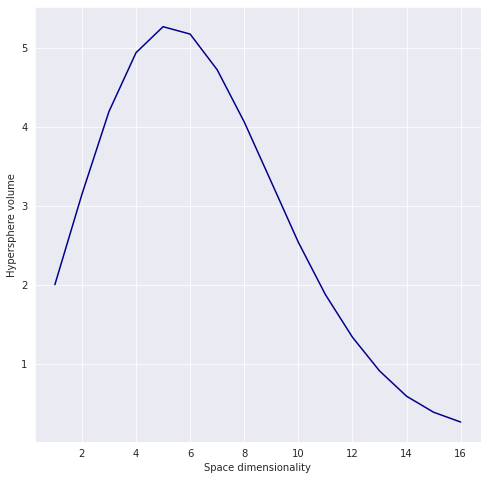

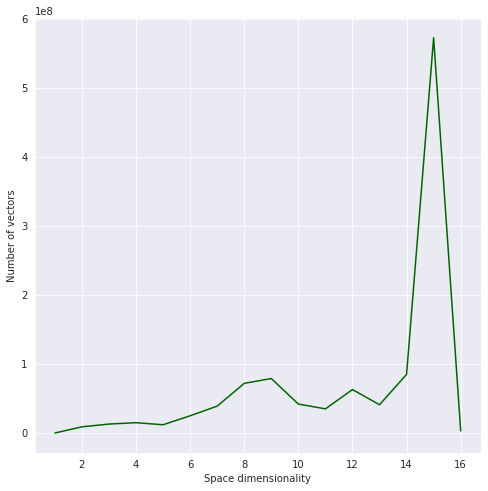

In [5]:
volume_plot, dots_plot = List(), List()
d = 16
real_answers = np.array([1, 2, np.pi, 4*np.pi/3, np.power(np.pi,2)/2,
                         8*np.power(np.pi,2)/15, np.power(np.pi,3)/6, 
                         16*np.power(np.pi,3)/105, np.power(np.pi,4)/24, 
                         32*np.power(np.pi,4)/945, np.power(np.pi,5)/120, 
                         64*np.power(np.pi,5)/10395, np.power(np.pi,6)/720, 
                         128*np.power(np.pi,6)/135135, np.power(np.pi,7)/5040,
                         15*np.power(np.pi,7)/118771, np.power(np.pi,8)/40320])

for dim in prange(1, d + 1):
    time_start = time.time()
    volumes, dots = calculation(dimensionality=dim)
    print(f'Calculation time for {dim}-dimensional sphere is {time.time() - time_start}s')
    print(f'The volume obtained = {volumes}. The inaccuracy from a real answer was {round(np.abs(real_answers[dim] - volumes), 6)}.')
    print(f'Sufficient number of vectors is {dots}.')
    volume_plot.append(volumes)
    dots_plot.append(dots)
    
sns.set_style("darkgrid")
plt.figure(figsize=(8, 8))
sns.lineplot(x = range(1, d+1), y=volume_plot, color='darkblue', linewidth = 1.5)
plt.xlabel('Space dimensionality')
plt.ylabel('Hypersphere volume')
plt.show()

plt.figure(figsize=(8, 8))
sns.lineplot(x = range(1, d+1), y=dots_plot, color='darkgreen', linewidth = 1.5)
plt.xlabel('Space dimensionality')
plt.ylabel('Number of vectors')
plt.show()